In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 0) Data Load

In [2]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [3]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [4]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [5]:
train_df = train_df1.copy()

train_17 = pd.read_csv('train_2017.csv',parse_dates=['transactiondate'],dtype={"parcelid": int})

prop_17 = pd.read_csv('properties_2017.csv',dtype={"parcelid": int})

train_df2 = pd.merge(train_17,prop_17,on='parcelid', how ='left',dtype={"parcelid": int})

train_df = pd.concat([train_df1,train_df2])

17년 데이터는 생략한 상태

# 1) Analysis Outer-Feature

## 1.1) Overview the Inner-feature data

- 'architecturalstyletypeid'
- 'bathroomcnt'
- 'calculatedbathnbr'
- 'threequarterbathnbr'
- 'fullbathcnt'
- 'bedroomcnt'
- 'roomcnt’
- 'garagecarcnt'
- 'garagetotalsqft'
- 'airconditioningtypeid'
- 'fireplacecnt'
- 'fireplaceflag'
- 'hashottuborspa'
- 'heatingorsystemtypeid'
- 'poolcnt'
- 'poolsizesum'
- 'pooltypeid10'
- 'pooltypeid2'
- 'pooltypeid7'

- inner_feature는 총 18개의 컬럼으로 이뤄져 있고, 분류 기준은 집 구성하는 미시적 요소들에 관한 것이다.
- 화장실 갯수를 의미하는 컬럼이 중복된다.(bathroomcnt, calculatebathnbr)

In [10]:
inner_feature= [
    '에어컨 아이디',
    '화장실 갯수',
    '화장실 갯수',
    '집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)',
    '풀옵션 화장실의 갯수',
    '침실 갯수',
     '주거지에있는 총 객실 수',
    '차고 갯수',
    '차고 평방(크기)',
    '에이컨 아이디',
    '벽난로 수',
    '벽난로가 있는지 없는지',
    '난방 시스템의 유무',
    '난방 시스템의 타입',
    '수영장 갯수',
    '수영장 크기',
     '스파 또는 온천',
     '스파 / 온수 욕조가있는 수영장',
    ' 온수 욕조가없는 수영장'
]

In [11]:
inner_feature_col=[
'airconditioningtypeid',
'bathroomcnt',
'calculatedbathnbr',
'threequarterbathnbr',
'fullbathcnt',
'bedroomcnt',
'roomcnt',
'garagecarcnt',
'garagetotalsqft',
'airconditioningtypeid',
'fireplacecnt',
'fireplaceflag',
'hashottuborspa',
'heatingorsystemtypeid',
'poolcnt',
'poolsizesum',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7'
]

In [12]:
inner_df = pd.DataFrame(columns=['name','feature'])
inner_df.name = inner_feature_col
inner_df.feature = inner_feature
inner_df

,name,feature
0,airconditioningtypeid,에어컨 아이디
1,bathroomcnt,화장실 갯수
2,calculatedbathnbr,화장실 갯수
3,threequarterbathnbr,집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)
4,fullbathcnt,풀옵션 화장실의 갯수
5,bedroomcnt,침실 갯수
6,roomcnt,주거지에있는 총 객실 수
7,garagecarcnt,차고 갯수
8,garagetotalsqft,차고 평방(크기)
9,airconditioningtypeid,에이컨 아이디


## 1.2) Datatype of Columns

In [13]:
print(train_df[inner_feature_col].dtypes,end='\n\n'),
print('Number of inner_feature_col:  {}'.format(len(inner_feature_col)))

airconditioningtypeid    float64
bathroomcnt              float64
calculatedbathnbr        float64
threequarterbathnbr      float64
fullbathcnt              float64
bedroomcnt               float64
roomcnt                  float64
garagecarcnt             float64
garagetotalsqft          float64
airconditioningtypeid    float64
fireplacecnt             float64
fireplaceflag             object
hashottuborspa            object
heatingorsystemtypeid    float64
poolcnt                  float64
poolsizesum              float64
pooltypeid10             float64
pooltypeid2              float64
pooltypeid7              float64
dtype: object

Number of inner_feature_col:  19


- Inner_feature에는 18개의 컬럼이 있고, 두 개의 object 자료형과 16개의 float형이 있다.
- numerical data, object data 를 가지고 있는 컬럼들을 나눠서 분석을 하도록 하겠다.

In [14]:
inner_numeric = []
inner_object = []
for col in inner_feature_col:
    if train_df[col].dtypes == 'float64':
        inner_numeric.append(col)
    else:inner_object.append(col)

In [15]:
inner_numeric
print(len(inner_numeric))

17


In [16]:
inner_object
print(len(inner_object))

2


## 1.3) Individual columns' feature analysis

### scatter plot about numerical data

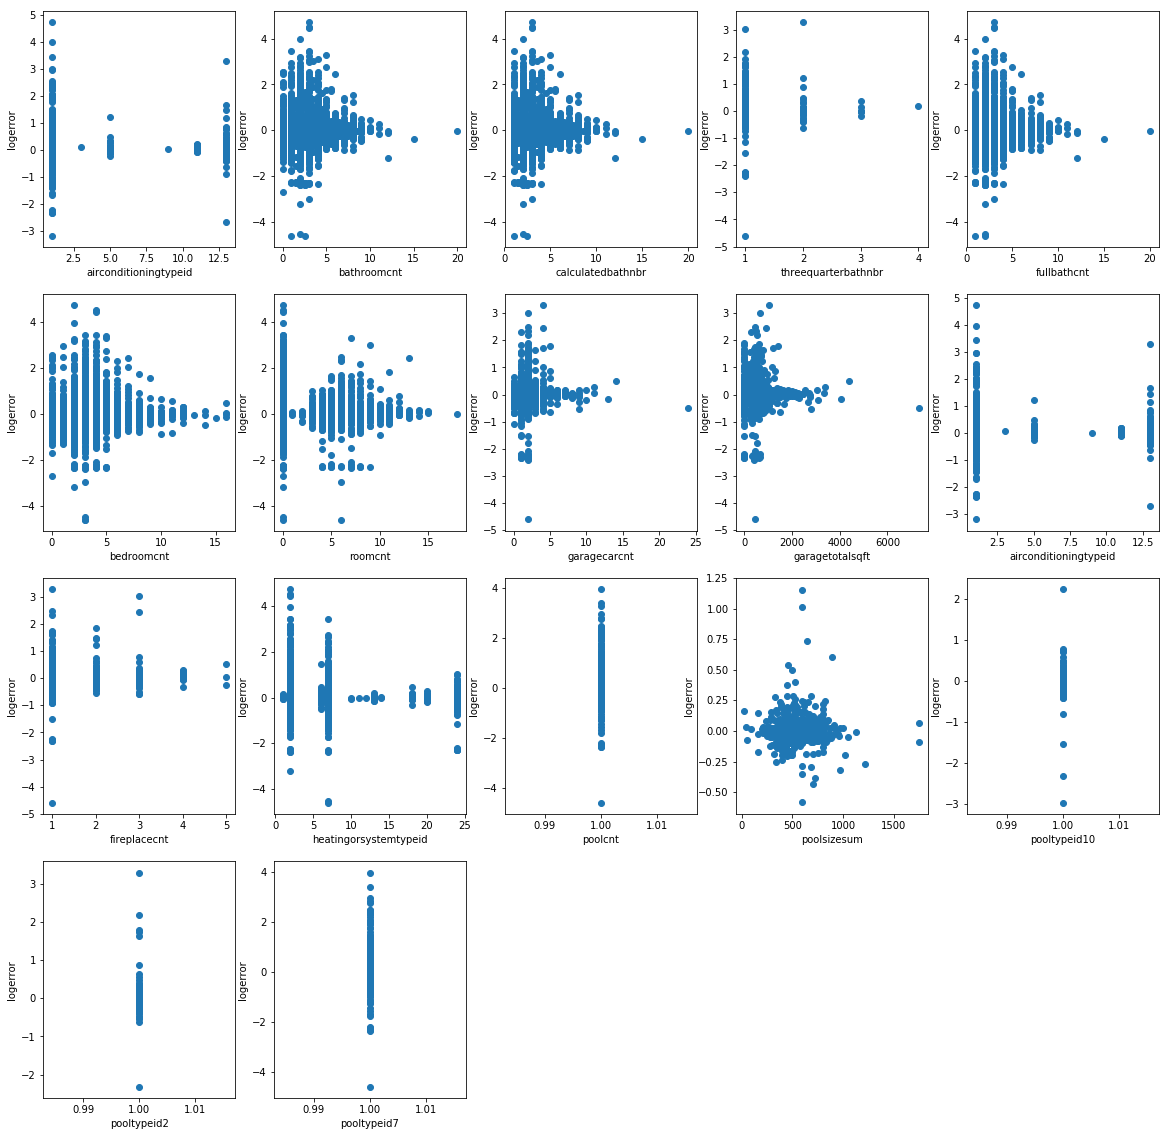

In [18]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(inner_numeric):
    plt.subplot(4,5,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- float 자료형에 대한 scatterplot을 그려본 결과 대부분의 분포 형태가 continuous하지 않고, discrete한 분포를 띄고 있다고 보여진다.
- 즉, numeric category를 가지고 있을 수 있는 컬럼이라고 생각하고, 카테고리의 갯수를 40개 미만으로 가지는 데이터에 대해서 다시 분포에 대해 시각화해본다.

In [19]:
discrete_inner_col = []
for idx,col in enumerate(inner_numeric):
    if len(train_df[col].value_counts())<40:
        print(train_df[col].value_counts())
        discrete_inner_col.append(col)
len(discrete_inner_col)

1.0     26668
13.0     1833
5.0       215
11.0       63
9.0         1
3.0         1
Name: airconditioningtypeid, dtype: int64
2.0     36534
3.0     19946
1.0     15035
2.5      8091
4.0      3743
1.5      1641
0.0      1165
5.0      1142
3.5      1091
4.5       795
6.0       448
5.5       253
7.0       155
8.0       114
6.5        54
9.0        36
10.0       14
7.5         9
11.0        3
12.0        3
8.5         1
20.0        1
15.0        1
Name: bathroomcnt, dtype: int64
2.0     36534
3.0     19946
1.0     15035
2.5      8084
4.0      3743
1.5      1636
5.0      1142
3.5      1088
4.5       793
6.0       448
5.5       253
7.0       155
8.0       114
6.5        54
9.0        36
10.0       14
7.5         9
11.0        3
12.0        3
8.5         1
20.0        1
15.0        1
Name: calculatedbathnbr, dtype: int64
1.0    11912
2.0       90
3.0        6
4.0        1
Name: threequarterbathnbr, dtype: int64
2.0     44635
3.0     21035
1.0     16671
4.0      4541
5.0      1392
6.0       49

15

40 개 미만의 카테고리를 가지는 discrete data column 이 총 15개가 나왔다. 이 컬럼들에 대해서 stripplot,viloinplot을 적용해 시각화한다.

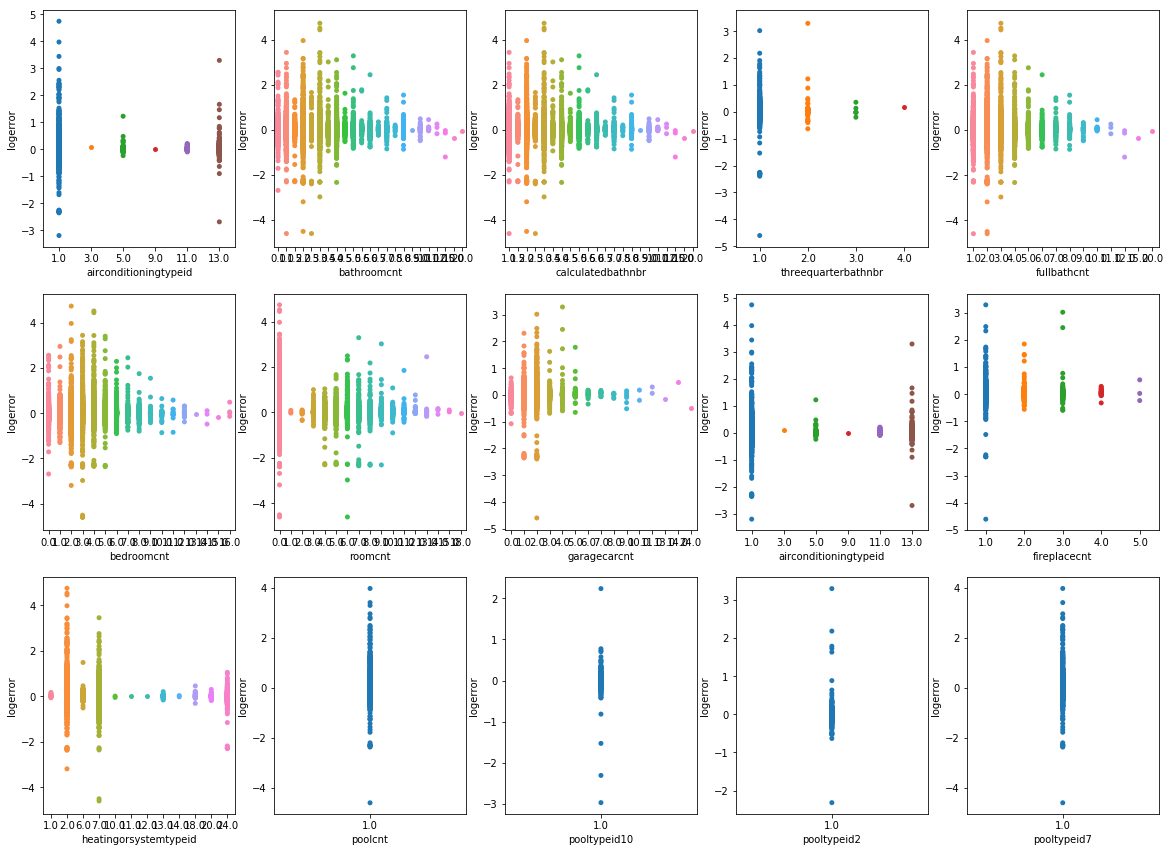

In [21]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_inner_col):
    plt.subplot(4,5,idx+1)
    sns.stripplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

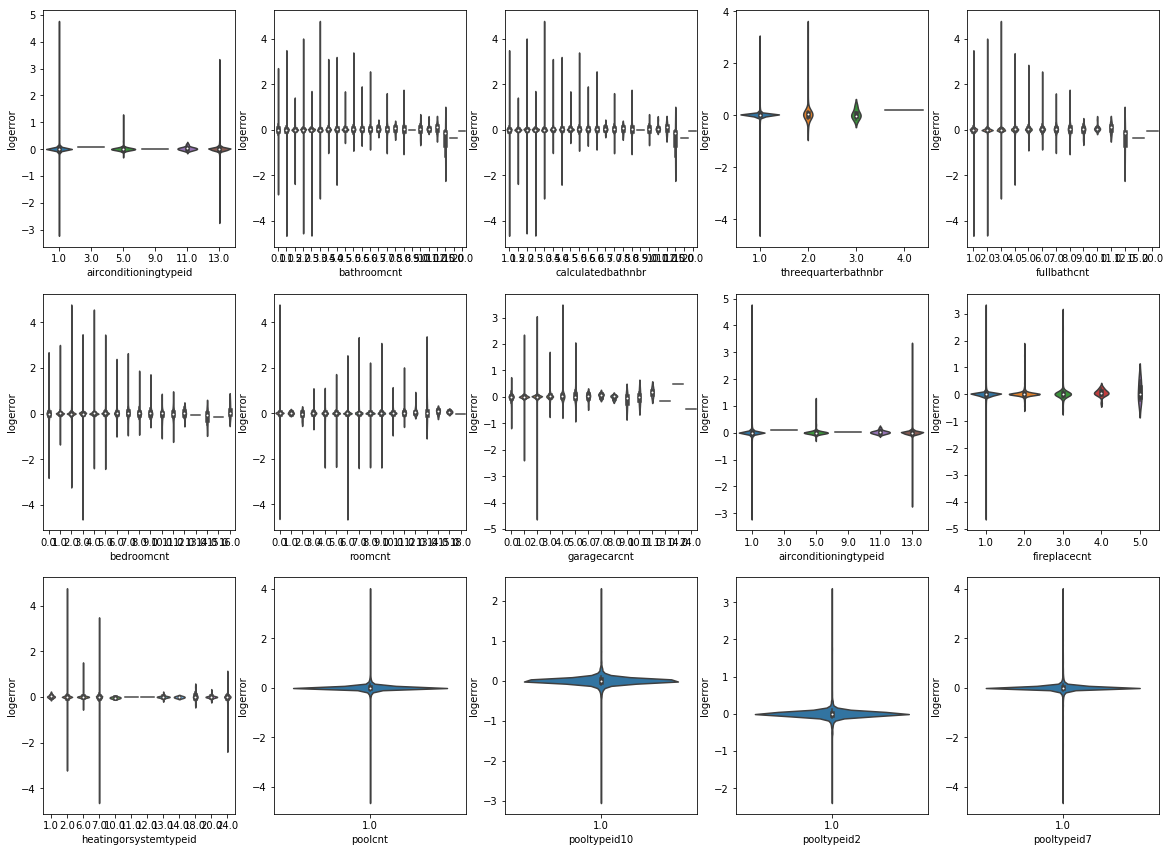

In [22]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_inner_col):
    plt.subplot(4,5,idx+1)
    sns.violinplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- 카테고리가 하나인 컬럼들이 존재한다.
- 카테고리와 분포도를 감안하고 곧 실시할 missing_value가 얼마나 차지할지를 고려하여서 Data cleaning을 실시

마지막으로, object datatype을 가지는 컬럼 2개에 대해서도 countplot으로 시각화를 한다.

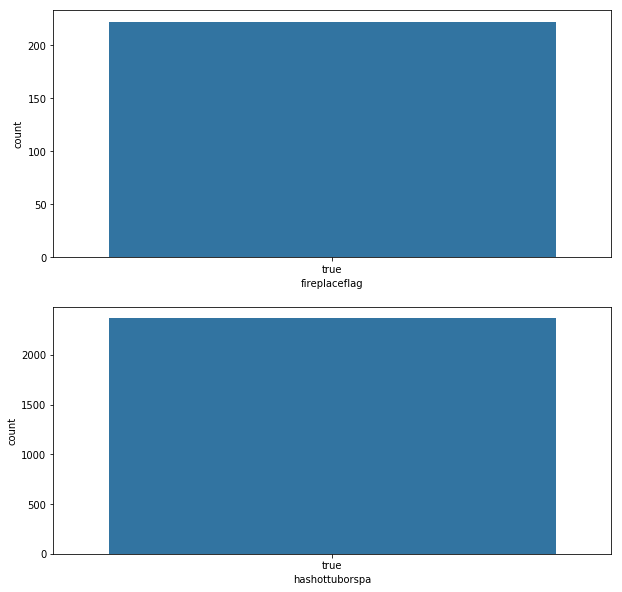

In [28]:
plt.figure(figsize=(10,10))
for idx,col in enumerate(inner_object):
    plt.subplot(2,1,idx+1)
    sns.countplot(train_df[col],data=train_df)
    plt.xlabel(col)
    plt.ylabel('count')
plt.show()

- object datatype에 대한 column 의 countplot을 보면, 카테고리가 하나다. 
- 곧 실시할 data cleaning에서의 imputation strategy에 참고해야 할 사항이다.

# 2) Analysis Missing value 

우선 inner-feature 내의 컬럼들로 구성된 데이터 프레임 'inner_df'를 생성해보겠습니다.

In [34]:
inner_df = train_df[inner_feature_col]
inner_df.tail()

,airconditioningtypeid,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt,bedroomcnt,roomcnt,garagecarcnt,garagetotalsqft,airconditioningtypeid,fireplacecnt,fireplaceflag,hashottuborspa,heatingorsystemtypeid,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7
90270,1.0,1.0,1.0,NaN,1.0,1.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0
90271,NaN,3.0,3.0,NaN,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
90272,NaN,2.0,2.0,NaN,2.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90273,NaN,2.0,2.0,NaN,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
90274,NaN,1.0,1.0,NaN,1.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN


In [26]:
missing_inner_df = inner_df.isnull().sum().reset_index()
missing_inner_df.columns = ['col','missing_cnt']
missing_inner_df['missing_ratio'] = missing_inner_df.missing_cnt / len(inner_df)
missing_inner_df.sort_values(by='missing_ratio',inplace=True)
missing_inner_df.reset_index(inplace=True)
missing_inner_df

,index,col,missing_cnt,missing_ratio
0,1,bathroomcnt,0,0.000000
1,5,bedroomcnt,0,0.000000
2,6,roomcnt,0,0.000000
3,2,calculatedbathnbr,1182,0.013093
4,4,fullbathcnt,1182,0.013093
5,13,heatingorsystemtypeid,34195,0.378787
6,7,garagecarcnt,60338,0.668380
7,8,garagetotalsqft,60338,0.668380
8,0,airconditioningtypeid,61494,0.681185
9,9,airconditioningtypeid,61494,0.681185


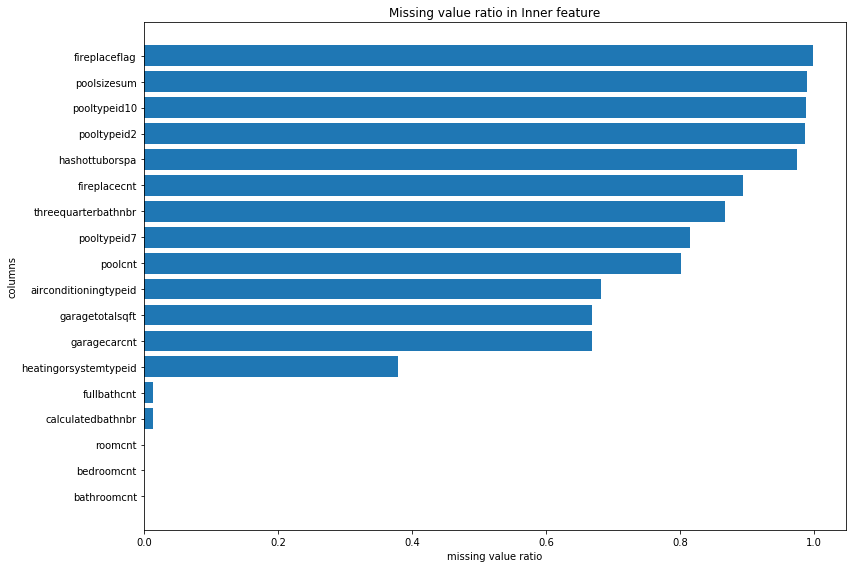

In [27]:
plt.figure(figsize=(12,8))
plt.barh(missing_inner_df.col,missing_inner_df.missing_ratio)
plt.title('Missing value ratio in Inner feature')
plt.xlabel('missing value ratio')
plt.ylabel('columns')
plt.tight_layout()
plt.show()

## 2.1) Fill the Missing data

In [89]:
missing_inner_df.tail()

,index,col,missing_cnt,missing_ratio
14,12,hashottuborspa,87910,0.973802
15,17,pooltypeid2,89071,0.986663
16,16,pooltypeid10,89114,0.987139
17,15,poolsizesum,89306,0.989266
18,11,fireplaceflag,90053,0.997541


- 위의 missing_ratio를 보면 5개의 컬럼이 NaN값의 비율이 99%가 넘는다. 이는 두 가지 이유로 나눠질 수 있다.
    - 0을 의미 -> 0으로 filling
    - 기록이 누락되었음, 그냥 없는 데이터를 의미 -> deleting columns
- missing_data에 대해서 delete가 아닌 filling을 선택할 때의 경우의 수
    - mean imputation : continous data
    - mode imputation : discrete data , categorical data
    - 'None' or '0' imputation : missing_data means zero in quantitative or qualitative prospect. 

#### bathroomcnt : 0.0%
- Description: 화장실 갯수
- Process: 해당 데이터는 missing_value가 없다. 별 다른 process없이 진행한다. 분포를 좀 더 살펴보면 집별로 화장실 갯수는 2개가 일반적(most common)임을 알 수 있다.

In [38]:
train_df.bathroomcnt.isnull().sum()

0

In [35]:
train_df.bathroomcnt.describe()

count    90275.000000
mean         2.279474
std          1.004271
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bathroomcnt, dtype: float64

In [36]:
train_df.bathroomcnt.value_counts().sort_values().tail()

4.0     3743
2.5     8091
1.0    15035
3.0    19946
2.0    36534
Name: bathroomcnt, dtype: int64

In [37]:
len(train_df.bathroomcnt.value_counts())

23

#### bedroomcnt	 : 0.0%
- Description: 침실 갯수
- Process: 해당 데이터는 missing_value가 없다. 별 다른 process없이 진행한다. 분포를 좀 더 살펴보면 집별로 침실 갯수는 3개가 일반적(most common)임을 알 수 있다.

In [40]:
train_df.bedroomcnt.isnull().sum()

0

In [41]:
train_df.bedroomcnt.describe()

count    90275.000000
mean         3.031869
std          1.156436
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: bedroomcnt, dtype: float64

In [42]:
train_df.bedroomcnt.value_counts().sort_values().tail()

1.0     3897
5.0     5077
4.0    20279
2.0    22357
3.0    35447
Name: bedroomcnt, dtype: int64

In [43]:
len(train_df.bedroomcnt.value_counts())

17

#### roomcnt	 : 0.0%
- Description: 주거지에있는 총 객실 수
- Process: 해당 데이터는 missing_value가 없다. 별 다른 process없이 진행한다. 분포를 좀 더 살펴보면 위의 다른 컬럼들과는 달리 0값이 많이 나오고 그 다음이 6개의 객실이 많이 나온다. 즉슨, 객실을 가지고 있지 않은 집이 일반적이며 객실이 있는 집들은 그 갯수가 많은 경향성을 띄고 있다고 해석할 수 있다. 집 값에 영향을 미칠 수 있다고 생각한다.

In [44]:
train_df.roomcnt.isnull().sum()

0

In [45]:
train_df.roomcnt.describe()

count    90275.000000
mean         1.478516
std          2.819627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: roomcnt, dtype: float64

In [46]:
train_df.roomcnt.value_counts().sort_values().tail()

8.0     3410
5.0     3486
7.0     4487
6.0     5353
0.0    69700
Name: roomcnt, dtype: int64

In [47]:
len(train_df.roomcnt.value_counts())

17

#### calculatedbathnbr	 : 1.3%
- Description: 화장실 갯수
- Process: 해당 데이터는 위의 bathroomcnt와 같은 것을 의미하는 컬럼이다. 이 컬럼에 대해서 briefing을 해보고, bathroomcnt와의 correl분석을 해보겠다.

In [48]:
train_df.calculatedbathnbr.describe()

count    89093.000000
mean         2.309216
std          0.976172
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: calculatedbathnbr, dtype: float64

In [49]:
train_df.calculatedbathnbr.value_counts().sort_values().tail()

4.0     3743
2.5     8084
1.0    15035
3.0    19946
2.0    36534
Name: calculatedbathnbr, dtype: int64

In [50]:
len(train_df.calculatedbathnbr.value_counts())

22

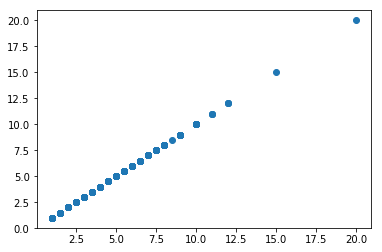

In [95]:
plt.scatter(train_df.bathroomcnt,train_df.calculatedbathnbr)
plt.show()

위의 표에서 보기와 같이 두 컬럼은 상관성이 높은 통계치를 가지고 있다. 따라서 missing_value ratio가 더 높은 calculatedbathnbr column을 `delete`한다.

#### fullbathcnt	 : 1.3%
- Description: 풀옵션 화장실의 갯수
- Process: 위의 bathroomcnt column과 샘플 측면에서 어떤 것들이 다르게 드러나는지 비교해서 확인해보겠다.

In [56]:
train_df.fullbathcnt.describe()

count    89093.000000
mean         2.241231
std          0.963142
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: fullbathcnt, dtype: float64

In [57]:
train_df.fullbathcnt.value_counts().sort_values().tail()

5.0     1392
4.0     4541
1.0    16671
3.0    21035
2.0    44635
Name: fullbathcnt, dtype: int64

In [58]:
len(train_df.fullbathcnt.value_counts())

14

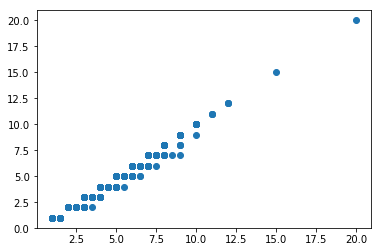

In [94]:
plt.scatter(train_df.bathroomcnt,train_df.fullbathcnt)
plt.show()

위의 표에서 보기와 같이 두 컬럼은 상관성이 높은 통계치를 가지고 있다. 따라서 missing_value ratio가 더 높은 fullbathcnt column을 `delete`한다.

#### heatingorsystemtypeid	 : 37.8%
- Description: 난방 시스템의 타입
- Process: describe method, count_value method를 통해 본결과 난방 시스템은 'Central'이라는 시스템이 가장 일반적으로(most common) 많이 사용되기 때문에, missing_value에 mode값을 넣어준다.

In [63]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.fillna(train_df.heatingorsystemtypeid.mode()[0])

In [60]:
train_df.heatingorsystemtypeid.describe()

count    56080.000000
mean         3.926979
std          3.684382
min          1.000000
25%          2.000000
50%          2.000000
75%          7.000000
max         24.000000
Name: heatingorsystemtypeid, dtype: float64

In [61]:
train_df.heatingorsystemtypeid.value_counts().sort_values().tail()

20.0       97
6.0       970
24.0     1071
7.0     15519
2.0     38303
Name: heatingorsystemtypeid, dtype: int64

In [62]:
len(train_df.heatingorsystemtypeid.value_counts())

12

#### garagecarcnt : 66.83%
- Description: 차고 갯수
- Process: discrete data로써 2개의 차고를 가지고 있는 집들이 가장 많기 때문에 (usual) mode값으로 filling_NaN 을 해준다.

In [67]:
train_df.garagecarcnt = train_df.garagecarcnt.fillna(train_df.garagecarcnt.mode()[0])

In [64]:
train_df.garagecarcnt.describe()

count    29937.000000
mean         1.812005
std          0.608761
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         24.000000
Name: garagecarcnt, dtype: float64

In [65]:
train_df.garagecarcnt.value_counts().sort_values().tail()

4.0      262
0.0      290
3.0      663
1.0     6679
2.0    21942
Name: garagecarcnt, dtype: int64

In [66]:
len(train_df.garagecarcnt.value_counts())

15

#### garagetotalsqft : 66.83%
- Description: 차고 평방(크기)
- Process: 차고 갯수를 나타내는 컬럼과 크기를 나타내는 컬럼의 missing_value 크기가 같다. zillow측에서 조사할 때 쌍으로 같이 조사한 것으로 보인다. 또한, values의 수가 70이며 sqft(volume)을 측정한 것으로 continuous data이다. 또한, min 값이 0이며 하위 25%까지 0값이 있는 것으로 보아 차고가 없으면 0이라고 따로 기제를 한 것이다. 이에 따라 missing_value에는 mean값으로 채워준다.

In [75]:
train_df.garagetotalsqft = train_df.garagetotalsqft.fillna(train_df.garagetotalsqft.mean()[0])

TypeError: 'float' object is not subscriptable

In [72]:
train_df.garagetotalsqft.describe()

count    29937.000000
mean       345.521228
std        267.015918
min          0.000000
25%          0.000000
50%        433.000000
75%        484.000000
max       7339.000000
Name: garagetotalsqft, dtype: float64

In [73]:
train_df.garagetotalsqft.value_counts().sort_values().tail()

462.0     728
360.0     735
441.0     796
400.0     970
0.0      9209
Name: garagetotalsqft, dtype: int64

In [74]:
len(train_df.garagetotalsqft.value_counts())

870

#### airconditioningtypeid : 68.16%
- Description: 에이컨 아이디
- Process: 통계치를 보게 되면, 압도적으로 1번 항목인, 'Central'이 많다. 이에 따라 missing_value에 mode값인 1을 취해준다.

In [79]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.fillna(train_df.airconditioningtypeid.mode()[0])

In [76]:
train_df.airconditioningtypeid.describe()

count    28781.000000
mean         1.816372
std          2.974168
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: airconditioningtypeid, dtype: float64

In [77]:
train_df.airconditioningtypeid.value_counts().sort_values().tail()

3.0         1
11.0       63
5.0       215
13.0     1833
1.0     26668
Name: airconditioningtypeid, dtype: int64

In [78]:
len(train_df.airconditioningtypeid.value_counts())

6

#### poolcnt : 80.17%
- Description: 수영장 갯수
- Process: 통계치에서 1만 있는 데이터가 나온다. 여기서 없는 데이터는 수영장이 없는 집이라고 생각할 수 있다. 따라서 missing_value에는 0을 넣는다.

In [84]:
train_df.poolcnt = train_df.poolcnt.fillna(0)

In [83]:
train_df.poolcnt.describe()

count    17901.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: poolcnt, dtype: float64

In [81]:
train_df.poolcnt.value_counts().sort_values().tail()

1.0    17901
Name: poolcnt, dtype: int64

In [82]:
len(train_df.poolcnt.value_counts())

1

#### pooltypeid7 : 81.50%
- Description: 온수 욕조가없는 수영장
- Process: 통계치에서 1만 있는 데이터가 나온다. 여기서 없는 데이터는 수영장이 없는 집이라고 생각할 수 있다. 따라서 missing_value에는 0을 넣는다.

In [88]:
train_df.pooltypeid7 = train_df.pooltypeid7.fillna(0)

In [85]:
train_df.pooltypeid7.describe()

count    16697.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: pooltypeid7, dtype: float64

In [86]:
train_df.pooltypeid7.value_counts().sort_values().tail()

1.0    16697
Name: pooltypeid7, dtype: int64

In [87]:
len(train_df.pooltypeid7.value_counts())

1

#### threequarterbathnbr : 86.69%
- Description:집 내 3/4 욕실 수 (샤워 + 세면대 + 화장실)
- Process: 이번에도 욕실의 수이다. bathroomcnt와 scatterplot으로 함께 나타내보면, 별다른 상관성을 지니고 있지는 않는 것으로 보인다. discrete value들을 보면 1-4까지 있고 0 값이 없으므로 missing_value에 0을 넣는다.

In [97]:
train_df.threequarterbathnbr = train_df.threequarterbathnbr.fillna(0)

In [90]:
train_df.threequarterbathnbr.describe()

count    12009.000000
mean         1.008743
std          0.100830
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: threequarterbathnbr, dtype: float64

In [91]:
train_df.threequarterbathnbr.value_counts().sort_values().tail()

4.0        1
3.0        6
2.0       90
1.0    11912
Name: threequarterbathnbr, dtype: int64

In [92]:
len(train_df.threequarterbathnbr.value_counts())

4

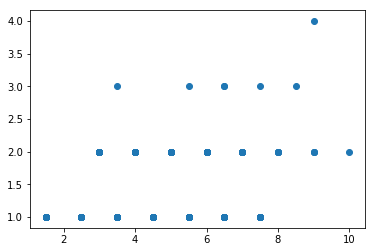

In [96]:
plt.scatter(train_df.bathroomcnt,train_df.threequarterbathnbr)
plt.show()

#### hashottuborspa :97.38%
- Description:난방 시스템의 유무
- Process: 해당 컬럼은 True or False 형태의 dtype:Object 인 컬럼이다. True = 1, False = 0으로 변환시켜준다.

In [113]:
# train_df.hashottuborspa = train_df.hashottuborspa.fillna(0)
# train_df.hashottuborspa[train_df.hashottuborspa == 'true'] = 1
train_df.hashottuborspa.value_counts()

0    87910
1     2365
Name: hashottuborspa, dtype: int64

In [98]:
train_df.hashottuborspa.describe()

count     2365
unique       1
top       true
freq      2365
Name: hashottuborspa, dtype: object

In [99]:
train_df.hashottuborspa.value_counts().sort_values().tail()

true    2365
Name: hashottuborspa, dtype: int64

In [100]:
len(train_df.hashottuborspa.value_counts())

1

#### fireplacecnt :89.35%
- Description:벽난로 수
- Process: 해당 컬럼의 discrete value을 살펴보면 1-5까지가 있다. 즉 missing_value의 의미는 벽난로가 없는 집을 의미한다. NaN -> 0

In [117]:
train_df.fireplacecnt  = train_df.fireplacecnt .fillna(0)

In [114]:
train_df.fireplacecnt.describe()

count    9607.000000
mean        1.187884
std         0.484173
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: fireplacecnt, dtype: float64

In [115]:
train_df.fireplacecnt.value_counts().sort_values().tail()

5.0       3
4.0      21
3.0     312
2.0    1106
1.0    8165
Name: fireplacecnt, dtype: int64

In [116]:
len(train_df.fireplacecnt.value_counts())

5

####  pooltypeid2 :  98.66%
- Description: 스파 / 온수 욕조가있는 수영장
- Process: 있다 없다로 나타내기 위해서 1이라는 데이터만 있는 상태이다. 없는 NaN값에 0을 넣어준다. 그런데, missing_value 비율이 매우 높은 상태에서 0값을 많이 넣어주면 정보력이 없어지게 된다. 따라서 컬럼 `delete`

In [118]:
train_df.pooltypeid2.describe()

count    1204.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: pooltypeid2, dtype: float64

In [119]:
train_df.pooltypeid2.value_counts().sort_values().tail()

1.0    1204
Name: pooltypeid2, dtype: int64

In [120]:
len(train_df.pooltypeid2.value_counts())

1

#### pooltypeid10 : 98.71%
- Description:   온수 욕조가없는 수영장
- Process: 있다 없다로 나타내기 위해서 1이라는 데이터만 있는 상태이다. 없는 NaN값에 0을 넣어준다. 그런데, missing_value 비율이 매우 높은 상태에서 0값을 많이 넣어주면 정보력이 없어지게 된다. 따라서 컬럼 `delete`

In [121]:
train_df.pooltypeid10.describe()

count    1161.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: pooltypeid10, dtype: float64

In [122]:
train_df.pooltypeid10.value_counts().sort_values().tail()

1.0    1161
Name: pooltypeid10, dtype: int64

In [123]:
len(train_df.pooltypeid10.value_counts())

1

#### poolsizesum : 98.92%
- Description:  수영장 크기
- Process: value_counts결과값이 매우 다양하다. 없는 데이터는 NaN 에 0을 넣으므로써 수영장이 없는 집임을 나타낼 수 있다. 하지만, missing_value_ratio가 너무 커서 0을 넣으면 정보력이 없어지게 된다. 그러므로 `delete`

In [124]:
train_df.poolsizesum.describe()

count     969.000000
mean      519.827657
std       155.054210
min        28.000000
25%       420.000000
50%       500.000000
75%       600.000000
max      1750.000000
Name: poolsizesum, dtype: float64

In [125]:
train_df.poolsizesum.value_counts().sort_values().tail()

600.0     35
500.0     36
800.0     39
400.0     41
450.0    105
Name: poolsizesum, dtype: int64

In [126]:
len(train_df.poolsizesum.value_counts())

273

#### fireplaceflag : 99.75%
- Description:  벽난로가 있는지 없는지
- Process: True or False 로 나뉘어져 있는 데이터이며, False를 나타내는 데이터가 누락된 것으로 보인다. 이 값들을 무언가로 채우게 되면, False값이 월등하게 많아지게 되서, 정보력이 없어진다. 따라서 `delete`

In [127]:
train_df.fireplaceflag.describe()

count      222
unique       1
top       true
freq       222
Name: fireplaceflag, dtype: object

In [128]:
train_df.fireplaceflag.value_counts().sort_values().tail()

true    222
Name: fireplaceflag, dtype: int64

In [129]:
len(train_df.fireplaceflag.value_counts())

1

# Data Cleaning

In [130]:
deleted_col = ['calculatedbathnbr','fullbathcnt','pooltypeid2','pooltypeid10','poolsizesum','fireplaceflag']
for deleted in deleted_col:
    inner_feature_col.remove(deleted)
inner_feature_col

['airconditioningtypeid',
 'bathroomcnt',
 'threequarterbathnbr',
 'bedroomcnt',
 'roomcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'airconditioningtypeid',
 'fireplacecnt',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'poolcnt',
 'pooltypeid7']

In [131]:
train_df.drop(columns=['calculatedbathnbr','fullbathcnt','pooltypeid2','pooltypeid10','poolsizesum','fireplaceflag'],inplace=True)
train_df.tail()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,...,2.0,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,1.0,NaN,NaN,3.0,3.0,NaN,4.0,...,2.0,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,1.0,NaN,NaN,2.0,4.0,NaN,7.0,...,2.0,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,2.0,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,1.0,NaN,NaN,1.0,3.0,NaN,7.0,...,2.0,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [132]:
train_df[inner_feature_col].tail()

,airconditioningtypeid,bathroomcnt,threequarterbathnbr,bedroomcnt,roomcnt,garagecarcnt,garagetotalsqft,airconditioningtypeid,fireplacecnt,hashottuborspa,heatingorsystemtypeid,poolcnt,pooltypeid7
90270,1.0,1.0,0.0,1.0,0.0,2.0,NaN,1.0,0.0,0,2.0,1.0,1.0
90271,1.0,3.0,0.0,3.0,0.0,2.0,NaN,1.0,0.0,0,2.0,0.0,0.0
90272,1.0,2.0,0.0,4.0,0.0,2.0,NaN,1.0,0.0,0,NaN,0.0,0.0
90273,1.0,2.0,0.0,2.0,0.0,2.0,NaN,1.0,0.0,0,2.0,0.0,0.0
90274,1.0,1.0,0.0,3.0,0.0,2.0,NaN,1.0,0.0,0,7.0,0.0,0.0
